In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Построить 5 графиков по выбранным данным.

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Я использовала датасет 'HappinessAlcoholConsumption' с сайта по ссылке https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption.
Краткое описание датасета:
Country, Region, Hemisphere - страна, регион и полушарие
HappinessScore - индекс счастья, прямо опрашивались люди с просьбой оценить уровень счастья от 0 до 10Б где 10 наиболее счастливы
HDI - индекс человеческого развития. Зависит от ожидаемой продолжительности жизни, образования и уровня ВВП
GDP_PerCapita - ВВП на душу населения из расчета паритета покупательной способности
Beer_PerCapita, Spirit_PerCapita, Wine_PerCapita - потребление пива, спирта и вина в литрах на душу населения в год

In [157]:
hac = pd.read_csv ('HappinessAlcoholConsumption.csv')
hac ['Alcogol_all'] = hac ['Beer_PerCapita'] + hac ['Spirit_PerCapita'] + hac ['Wine_PerCapita']
hac.head ()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Alcogol_all
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493


График 0. Разминочный. Начнем с простого. График распределения индекса счастья. Цель -посмотреть на распределение значений индекса счастья. Переменная используется всего одна - 'HappinessScore'. Гистограмма была выбрана из-за ее простоты и наглядности. Максимальное количество стран - 10 заявляют о среднем уровне счастья (оценки на уровне 5,1-5,2), 7 стран заявляют об уровне счастья на уровне 4,3-4,4, 1 страна заявляет об уровне счастья 3,2-3,3 - это минимальный уровень счастья, и 4 страны с максимальным уровнем счастья примерно 7,5. Легко читается как сама гистограмма, так и ее данные.

Text(0.5, 1.0, 'Распределение индекса счастья по странам')

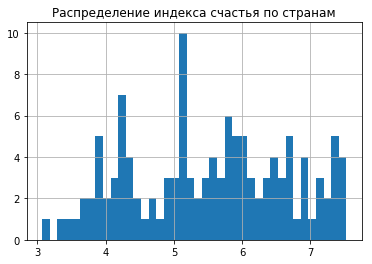

In [50]:
hac ['HappinessScore'].hist (bins = 40)
plt.title ('Распределение индекса счастья по странам')

График 1. График распределения индекса счастья по странам. Цель - увидеть самые счастливые и самые несчастливые страны. Используется две переменные - Country и HappinessScore. Чем хорош этот столбчатый график, так это тем, что наглядно можно увидеть страны-счастливчики и страны-несчастливчики. К сожалению Россия к счастливчикам не примыкает, но, к счастью, и к несчастливчикам тоже. Если на гистограмме можно просто увидеть распределение по количеству стран, то в этом графике "героев" можно увидеть в лицо. Что не понравилось в этом графике - для больших данных его не очень удобно использовать. Он сильно перегружен. Но если нужно посмотреть рейтинг - топ самых успешных стран например, то тут он прекрасно визуализирует данные.

<BarContainer object of 15 artists>

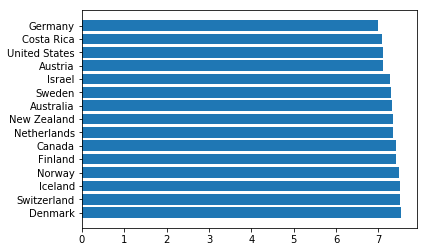

In [94]:
hac_barh = hac.sort_values('HappinessScore', ascending=False).head (15)
plt.barh(hac_barh['Country'], hac_barh['HappinessScore'])

<BarContainer object of 15 artists>

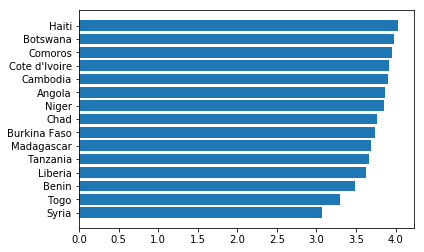

In [95]:
hac_barh = hac.sort_values('HappinessScore').head (15)
plt.barh(hac_barh['Country'], hac_barh['HappinessScore'])

График 2. Распределение индекса человеческого развития по регионам. Цель - посмотреть распределение индекса человеческого развития по регионам. В качестве переменных выбрано среднее значение индекса HDI для каждого региона и название региона. Данный тип графика на мой взгляд очень хорошо отображает отсортированные данные. Например можно сразу увидеть, даже не глядя на цифры, что индекс HDI региона Sub-Saharan Africa почти вдвое ниже региона Australia and New Zealand

In [62]:
hdi_regions = hac [['HDI', 'Region']].groupby ('Region').mean().sort_values('HDI', ascending=False)
hdi_regions.style.bar(align='mid')

,HDI
Region,
Australia and New Zealand,926.5
North America,922
Western Europe,908.35
Eastern Asia,824.5
Central and Eastern Europe,794.704
Middle East and Northern Africa,760.364
Latin America and Caribbean,728.087
Southeastern Asia,727.8
Sub-Saharan Africa,536.393


График 3.1. График корреляции уровня счастья и ВВП (ниже HDI). Цель - проверить утверждение "не в деньгах счастье". В качестве переменных использовались HappinessScore и GDP_PerCapita. Был выбран данный график не только из-за диаграммы рассеяния, но и потому, что здесь можно добавить линию регрессии, на мой взгляд она позволяет показать корреляцию более точно, ну и по бокам диаграммы расположены гистограммы распределения для каждой переменной. На мой взгляд это удобно и не сильно перегружает график. Ниже точно такой же график, но уже для переменных HappinessScore и HDI, там корреляция выражена сильнее, добавлена линия регрессии.

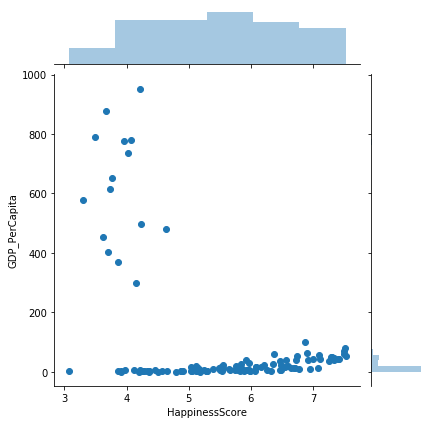

In [134]:
sns.jointplot (x= 'HappinessScore', y= 'GDP_PerCapita', data = hac)

График 3.2. Уже после того, как начала сравнивать данные обнаружила, что выбросы в данных довольно странные. Начала разбираться, обнаружилось, что для региона Sub-Saharan Africa, самого HDI недружественного, уровень ВВП вдруг оказался больше 200, в описании датасета не обнаружила почему, полагаю, что ВВП приведен в местной валюте. Поэтому к графику 3.1 пришлось добавить два подграфика, причем на первом видна корреляция между ВВП и уровнем счастья, на втором явно она практически отсутствует. Вывод: утверждение не совсем верно. Связь между уровнем счастья и уровнем дохода все-таки довольно сильная, если только уровень дохода не в африканской валюте.

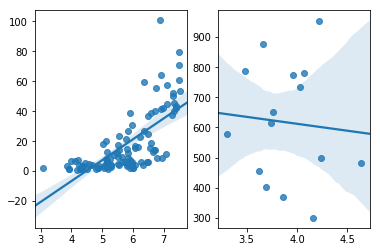

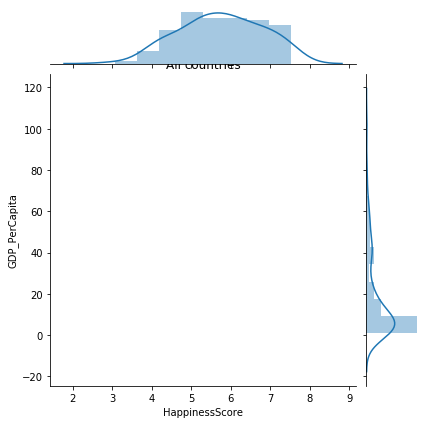

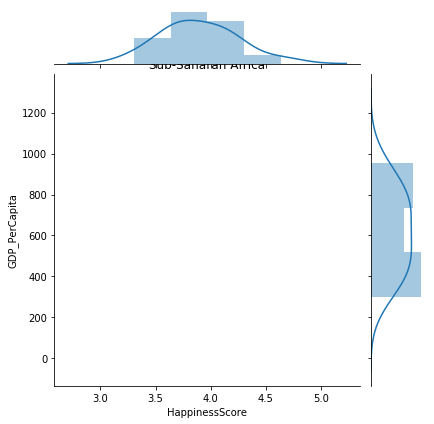

In [148]:
hac_GDP = hac [['GDP_PerCapita', 'HappinessScore']]
hac_all_countries = hac_GDP[hac_GDP['GDP_PerCapita']<= 200]
hac_ssa = hac_GDP[hac_GDP['GDP_PerCapita'] > 200]
fig, ax =plt.subplots(1,2)
ac = sns.jointplot (x= 'HappinessScore', y= 'GDP_PerCapita', data = hac_all_countries, kind = 'reg', ax=ax[0])
plt.title('All countries')
ssa=sns.jointplot (x= 'HappinessScore', y= 'GDP_PerCapita', data = hac_ssa, kind = 'reg', ax=ax[1])
plt.title('Sub-Saharan Africa')
plt.show ()

In [ ]:
График 3.3. Взаимосвязь между уровнем счастья и индексом HDI. Довольно сильная.

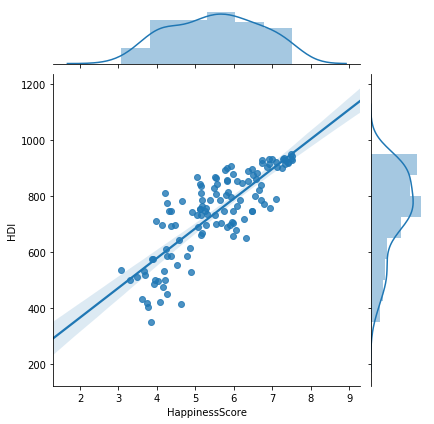

In [101]:
sns.jointplot (x= 'HappinessScore', y= 'HDI', data = hac, kind = 'reg')

График 4.1. График корреляции уровня счастья и общего употребления алкоголя. Цель - проверить утверждение "истина/счастье в вине". В качестве переменных использовались HappinessScore и Alcogol_all. Данный график был выбран, потому что хотелось уже чего-нибудь попроще. Сильная корреляция тут не наблюдается, просто беспорядочный разброс точек, линия регрессии может быть даже лишней. Утверждение не верно.

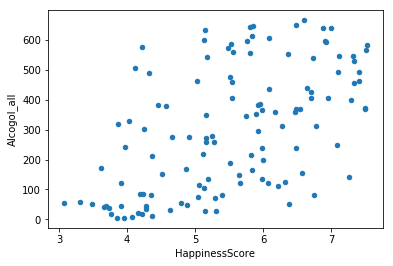

In [109]:
hac.plot.scatter (x = 'HappinessScore', y = 'Alcogol_all')

График 4.2. Может быть корреляция будет зависеть от типа алкоголя? Ниже использую график pairplot. Переменные - 'Country', 'HappinessScore', 'Beer_PerCapita', 'Spirit_PerCapita','Wine_PerCapita'. На мой взгляд он очень информативен, но использовать его приходится с осторожностью. Лучше всего указать требуемые столбцы, чтобы не перебирать весь датасет. Зато в этом графике имеются и гистограммы, и графики рассеяния, он позволяет сравнивать различные данные, корреляцию различных данных друг с другом. Очень удобен. Например тут видно, что "счастливые" предпочитают пиво и вино. 

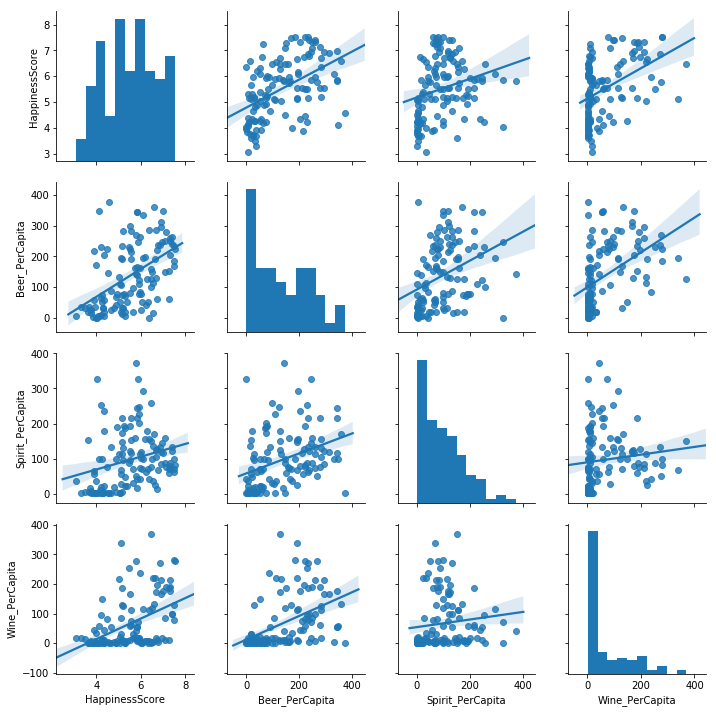

In [150]:
sns.pairplot (hac [['Country', 'HappinessScore', 'Beer_PerCapita', 'Spirit_PerCapita','Wine_PerCapita']], kind = 'reg')

График 5. График распределения потребления алкоголя по типу алкоголя. Цель - посмотреть распределение  потребления алкоголя по типу алкоголя. В качестве переменных выбраны 'Beer_PerCapita', 'Spirit_PerCapita','Wine_PerCapita', 'Alcogol_all. Данный тип графика наглядно демонстрирует количество потребляемого алкоголя в зависимости от его типа. Для сравнения привела общее количество алкоголя. Очень хорошо видно, что во всем мире потребляют больше пива, потом крепкие алкогольные напитки, меньше всего потребляют вино. 

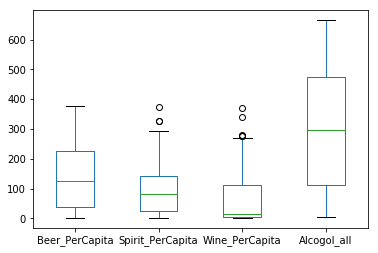

In [165]:
alkotester = hac [['Beer_PerCapita', 'Spirit_PerCapita','Wine_PerCapita', 'Alcogol_all']]
alkotester.plot.box ()

График 5.1. Попытка использовать plotly.

In [166]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

3.10.0


In [167]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [170]:
alkotester.iplot(kind='box')

График 6. Просто понравилось plotly. График распределения потребления алкоголя и индекса счастья в разрезе стран. Цель - посмотреть распределение  потребления алкоголя в топ 20 стран в зависимости от индекса счастья. В качестве переменных выбраны 'Country', 'Alcogol_all', 'HappinessScore'. Данный тип графика интерактивно и наглядно демонстрирует количество потребляемого алкоголя на уровне индекса счастья. Заметно, что топ самых "счастливых" стран в топ самых пьющих не входит.

In [190]:
most_alco_country = hac [['Country', 'Alcogol_all', 'HappinessScore']].sort_values('Alcogol_all', ascending=False).head (20)
most_alco_country.iplot(kind='bubble',x='Country',y='HappinessScore', size = 'Alcogol_all')